# <center> <h1> 🧔👨 👨🏾‍🦰 👨‍💻 👱‍♀️ 👩‍🦰👩🏿‍🦰

## <center> We create the same model in PyTorch and TensorFlow and train the same dataset and see the difference in the codes.
## <center> Let's compare the results at the end

In [92]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import pathlib
from torch.optim import Adam
import glob
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn

# <center> PyTorch

In [93]:
# Check CPU or GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [94]:
# Transforms allow us to perform several operations on images during loading,
# such as resizing, normalizing, and scaling

transformer = transforms.Compose([
    transforms.Resize((224,224)), # bring our images to the same size.
    transforms.ToTensor(),  # Converts 0-255 images, [0-1] to tensors
    transforms.Normalize([0.5,0.5,0.5], # average (separately for each channel)
                        [0.5,0.5,0.5])  # std (separately for each channel)
])                                      # allows us to normalize our tensor image with mean and standard deviation
                                        # taking the mean and std as 0.5 
                                        # helps us shift the image to [-1,1] instead of [0-1] 
                                        # formula (x-mean)/std


In [95]:
# We show the folder where our datset is
train_path = 'Datasets/gender/train'
test_path = 'Datasets/gender/test'


# DataLoader is needed to iteratively retrieve images
train_loader = DataLoader(
    torchvision.datasets.ImageFolder(train_path,transform=transformer),
    batch_size = 32, shuffle=True
)
test_loader = DataLoader(
    torchvision.datasets.ImageFolder(test_path,transform=transformer),
    batch_size = 32, shuffle=True
)



In [96]:
# classes
root = pathlib.Path(train_path)
classes = sorted([j.name.split('/')[-1] for j in root.iterdir()])

In [97]:
print(classes)

['man', 'woman']


In [98]:
# show picture
dataiter = iter(train_loader)
dataiter
# we get the iteration object

In [99]:
images, labels = next(dataiter)
# we get batch images and labels from iteration

In [100]:
images
# our images are in [-1,1].

tensor([[[[-0.9922, -0.9922, -0.9765,  ..., -0.9216, -0.9294, -0.9216],
          [-0.9922, -0.9922, -0.9843,  ..., -0.9216, -0.9294, -0.9216],
          [-0.9922, -0.9922, -0.9843,  ..., -0.9373, -0.9373, -0.9216],
          ...,
          [-0.9765, -0.9843, -0.9843,  ...,  0.3882,  0.4353,  0.4902],
          [-0.9765, -0.9843, -0.9843,  ...,  0.3569,  0.3804,  0.4902],
          [-0.9686, -0.9765, -0.9765,  ...,  0.3333,  0.3176,  0.4824]],

         [[-1.0000, -1.0000, -0.9843,  ..., -0.9294, -0.9373, -0.9216],
          [-1.0000, -1.0000, -0.9922,  ..., -0.9294, -0.9294, -0.9216],
          [-1.0000, -1.0000, -0.9922,  ..., -0.9373, -0.9373, -0.9216],
          ...,
          [-0.9843, -0.9843, -0.9922,  ...,  0.3882,  0.4353,  0.4902],
          [-0.9765, -0.9843, -0.9843,  ...,  0.3569,  0.3804,  0.4902],
          [-0.9686, -0.9765, -0.9765,  ...,  0.3333,  0.3176,  0.4824]],

         [[-0.9608, -0.9608, -0.9451,  ..., -0.8196, -0.8275, -0.8275],
          [-0.9608, -0.9608, -

In [101]:
images.shape
# batch_size = 32 so there are 32 images
# if you pay attention to the size of the picture, it is 3x224x224, we will correct it below


torch.Size([32, 3, 224, 224])

In [102]:
labels

tensor([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 0, 0])

In [103]:
image = torchvision.utils.make_grid(images) # 
image
# The make_grid() function accepts a 4D tensor of the form [B, C, H, W].
# where B represents the batch size, C represents the number of channels, 
# and H, W represents the height and width respectively. Height and width should be the same for all images..
# This function returns a tensor containing a grid of input images.
# To put it more simply, it returns multiple images into one, that is, if we have 32 images in a batch, 
# it returns 1 tensor containing all of them

tensor([[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000, -0.9922,  ..., -0.4118,  0.0000,  0.0000],
         ...,
         [ 0.0000,  0.0000, -0.4510,  ...,  0.9373,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000, -1.0000,  ..., -0.6941,  0.0000,  0.0000],
         ...,
         [ 0.0000,  0.0000, -0.4902,  ...,  0.9294,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0

In [104]:
image.shape

torch.Size([3, 906, 1810])

In [105]:
torch.min(image)

tensor(-1.)

In [106]:
torch.max(image)

tensor(1.)

In [107]:
np_image = image.numpy()
np_image
# convert to numpy

array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        , -0.99215686, ..., -0.41176468,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        , -0.45098037, ...,  0.9372549 ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        , -1.        , ..., -0.69411767,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        , -0.49019605, ...,  

In [108]:
np_image.shape

(3, 906, 1810)

In [109]:
image = np.transpose(np_image, (1,2,0)) 
image.shape                             
# (1,2,0) 1 is the 1st channel of our np_image, 2 is the 2nd channel of our np_image,
# and 0 is the 0th channel of our np_image
# the size of our tensor is 3 x 96 x 1810 ie inverse we can't see this image so we change it to 906 x 1810 x 3

(906, 1810, 3)

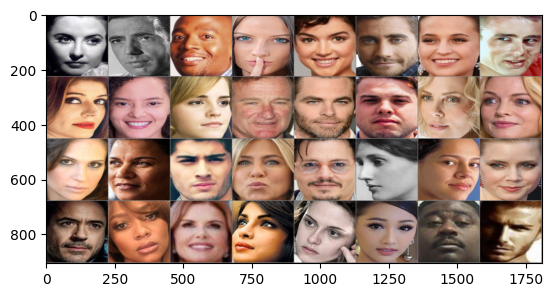

In [110]:
plt.imshow(image/2+0.5) #unnormalize
plt.show()
# why are we doing image/2+0.5 ?
# because matplotlib accepts numbers in the range [0,1] if the plot is a float
# if int to [0.255].
# and our image is to [-1,1].
# so we're doing image/2+0.5 to bring them to [0,1] 🙂 .



#       plt.imshow(image)
#       plt.show()
# try using this and see the difference

In [111]:
labels

tensor([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 0, 0])

In [112]:
classes

['man', 'woman']

# <center> PyTorch. We will create our model

In [143]:
# we can create a model

class CNNModel(nn.Module):
    def __init__(self, num_classes = 2):
        super(CNNModel, self).__init__()
        
        #Input shape = (3,224,224) 
        
        # padding = 1 (padding=1 == padding="same") 
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 8, kernel_size = 3, stride = 1, padding = 1)
        #Shape=(8,224,224)
        
        # Relu activation function
        self.relu1 = nn.ReLU()
        #Shape=(8,224,224)
        
        # reduce the image by 2 times
        self.pool1 = nn.MaxPool2d(kernel_size = 2)
        #Shape=(8,112,112)
        
        
        self.conv2 = nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = 3, stride = 1, padding = 1)
        #Shape=(16,112,112)
        
        # Relu activation function
        self.relu2 = nn.ReLU()
        #Shape=(16,112,112)
        
        # reduce the image by 2 times
        self.pool2 = nn.MaxPool2d(kernel_size = 2)
        #Shape=(16,56,56)
        

        self.conv3 = nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 3, stride = 1, padding = 1)
        #Shape=(32,56,56)
        
        # Relu activation function
        self.relu3 = nn.ReLU()
        #Shape=(32,56,56)
        
        # reduce the image by 2 times
        self.pool3 = nn.MaxPool2d(kernel_size = 2)
        #Shape=(32,28,28)
        
        
        self.conv4 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, stride = 1, padding = 1)
        #Shape=(32,28,28)
        
        # Relu activation function
        self.relu4 = nn.ReLU()
        #Shape=(32,28,28)
        
        # reduce the image by 2 times
        self.pool4 = nn.MaxPool2d(kernel_size = 2)
        #Shape=(64,14,14)
        

        
        self.fc1 = nn.Linear(in_features=14 * 14 * 64, out_features = 100)
        #Shape=(14*14*64, 100)
        
        # Relu activation function
        self.relu5 = nn.ReLU()
        
        self.fc2 = nn.Linear(in_features=100, out_features = num_classes)
        #Shape=(100, num_classes=2)
        # Sofmtax activation function
        self.softmax1 = nn.Softmax(dim=1)
        
        
    # forward calucation
    def forward(self, input):
        output = self.conv1(input)
        output = self.relu1(output)
        output = self.pool1(output)
            
        output = self.conv2(output)
        output = self.relu2(output)
        output = self.pool2(output)
        
        output = self.conv3(output)
        output = self.relu3(output)
        output = self.pool3(output)
        
        output = self.conv4(output)
        output = self.relu4(output)
        output = self.pool4(output)
            

        # flatten
        output = output.view(-1, 64*14*14)
                 
        output = self.fc1(output)
        output = self.relu5(output)
        output = self.fc2(output)
        output = self.softmax1(output)
            
        return output

In [144]:
model = CNNModel(num_classes = 2).to(device)
print(model)

CNNModel(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu4): ReLU()
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=12544, out_features=100, bias=True)
  (relu5): ReLU()
  (fc2): Linear(in_features=100, out_features=2, bias=True)
  (softmax1): Softmax(dim=1)
)


In [145]:
# we select optimizer and loss
optimizer = Adam(model.parameters(), lr=0.001) # Adam optimizer

loss_function = nn.CrossEntropyLoss() # Cros Entropy Lossni 

In [1]:
# list(model.parameters())
# initial weights and biases

In [147]:
num_epochs = 10 # number of epochs

In [148]:
# We calculate the number of images for train and test, which we need to calculate loss and accuracy
train_count = len(glob.glob(train_path + '/**/*.jpg'))
test_count = len(glob.glob(test_path + '/**/*.jpg'))

In [149]:
print(train_count,test_count)

1876 470


# <center> PyTorch. Train

In [150]:
for epoch in range(num_epochs):
    
    model.train()
    train_accuracy = 0.0
    train_loss = 0.0
    
    for i, (images, labels) in enumerate(train_loader):
        # if we use it on the video card, it will be necessary
        if torch.cuda.is_available():
            images = Variable(images.cuda())
            labels = Variable(labels.cuda())
        
        # we set the gradient to 0 every cycle
        optimizer.zero_grad()
        
        outputs = model(images) #forward calculation
        loss = loss_function(outputs, labels) # find the loss
        
        loss.backward() # backward calculation
        optimizer.step() # Performs one optimization step (parameter update).
        
        
        train_loss += loss.cpu().data*images.size(0) # loss calculation
        
        _, prediction = torch.max(outputs.data, 1) # we get predicted classes
        # We calculate the accuracy by comparing our predicted values and the actual values
        train_accuracy += int(torch.sum(prediction==labels.data)) 
        
    train_accuracy = train_accuracy/train_count # accuracy
    train_loss = train_loss/train_count # loss
    
    print('Epoch: ' + str(epoch) +' Train Loss: ' + str(train_loss) + ' Train Accuracy: ' + str(train_accuracy))
    

Epoch: 0 Train Loss: tensor(0.5624) Train Accuracy: 0.7281449893390192
Epoch: 1 Train Loss: tensor(0.4599) Train Accuracy: 0.8464818763326226
Epoch: 2 Train Loss: tensor(0.4283) Train Accuracy: 0.8811300639658849
Epoch: 3 Train Loss: tensor(0.4192) Train Accuracy: 0.8907249466950959
Epoch: 4 Train Loss: tensor(0.4064) Train Accuracy: 0.9051172707889126
Epoch: 5 Train Loss: tensor(0.3972) Train Accuracy: 0.9131130063965884
Epoch: 6 Train Loss: tensor(0.3833) Train Accuracy: 0.9264392324093816
Epoch: 7 Train Loss: tensor(0.3806) Train Accuracy: 0.9323027718550106
Epoch: 8 Train Loss: tensor(0.3794) Train Accuracy: 0.9317697228144989
Epoch: 9 Train Loss: tensor(0.3742) Train Accuracy: 0.9386993603411514


# <center> PyTorch. Evaluate

In [151]:
model.eval()
    
test_accuracy = 0.0
test_loss = 0.0

for i, (images, labels) in enumerate(test_loader):
    if torch.cuda.is_available():
        images = Variable(images.cuda())
        labels = Variable(labels.cuda())
        
    # predict
    outputs = model(images)
    
    # loss
    loss = loss_function(outputs, labels) 
    test_loss += loss.cpu().data*images.size(0) 
    
    # accuracy
    _,prediction = torch.max(outputs.data, 1)
    test_accuracy += int(torch.sum(prediction==labels.data))
    
test_accuracy = test_accuracy / test_count
test_loss = test_loss / test_count

    
print(' Test Loss: ' + str(test_loss) + ' Test Accuracy: ' + str(test_accuracy))

 Test Loss: tensor(0.3836) Test Accuracy: 0.925531914893617


# <center> PyTorch. Predict

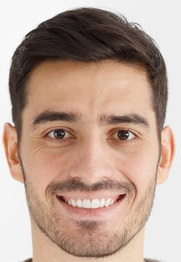

In [131]:
# We will check with a picture
image = Image.open("Photo/man2.jpg")
image

In [132]:
# As we did with the train image, we will do the same with the test image

transformer = transforms.Compose([
    transforms.Resize((224,224)), # bring our images to the same size.
    transforms.ToTensor(),  # Converts 0-255 images, [0-1] to tensors
    transforms.Normalize([0.5,0.5,0.5], # average (separately for each channel)
                        [0.5,0.5,0.5])  # std (separately for each channel)
])                                      # allows us to normalize our tensor image with mean and standard deviation
                                        # taking the mean and std as 0.5 
                                        # helps us shift the image to [-1,1] instead of [0-1] 
                                        # formula (x-mean)/std



In [133]:
image_tensor = transformer(image).unsqueeze(0)
image_tensor
# we can transfer the image to tensor

tensor([[[[0.9373, 0.9373, 0.9373,  ..., 0.8745, 0.8745, 0.8745],
          [0.9373, 0.9373, 0.9373,  ..., 0.8745, 0.8745, 0.8745],
          [0.9373, 0.9373, 0.9373,  ..., 0.8745, 0.8745, 0.8745],
          ...,
          [0.9059, 0.9059, 0.9059,  ..., 0.8667, 0.8667, 0.8667],
          [0.9059, 0.9059, 0.9059,  ..., 0.8667, 0.8667, 0.8667],
          [0.9059, 0.9059, 0.9059,  ..., 0.8667, 0.8667, 0.8667]],

         [[0.9373, 0.9373, 0.9373,  ..., 0.8745, 0.8745, 0.8745],
          [0.9373, 0.9373, 0.9373,  ..., 0.8745, 0.8745, 0.8745],
          [0.9373, 0.9373, 0.9373,  ..., 0.8745, 0.8745, 0.8745],
          ...,
          [0.9059, 0.9059, 0.9059,  ..., 0.8667, 0.8667, 0.8667],
          [0.9059, 0.9059, 0.9059,  ..., 0.8667, 0.8667, 0.8667],
          [0.9059, 0.9059, 0.9059,  ..., 0.8667, 0.8667, 0.8667]],

         [[0.9373, 0.9373, 0.9373,  ..., 0.8745, 0.8745, 0.8745],
          [0.9373, 0.9373, 0.9373,  ..., 0.8745, 0.8745, 0.8745],
          [0.9373, 0.9373, 0.9373,  ..., 0

In [134]:
image_tensor.shape

torch.Size([1, 3, 224, 224])

In [135]:
# predict 
output = model(image_tensor)
output

C:\Users\djdle\AppData\Local\Temp\ipykernel_384\1861424205.py:99: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax1(output)


tensor([[0.9928, 0.0072]], grad_fn=<SoftmaxBackward0>)

In [136]:
index = output.argmax()
class_name = classes[index]
class_name
# class name

'man'

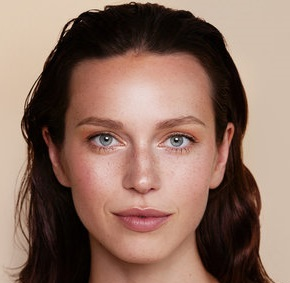

In [137]:
# We will check with a picture
image = Image.open("Photo/woman11.jpg")
image

In [138]:
image_tensor = transformer(image).unsqueeze(0)
image_tensor
# we can transfer the image to tensor

tensor([[[[0.7647, 0.7647, 0.7647,  ..., 0.6471, 0.6471, 0.6471],
          [0.7647, 0.7647, 0.7647,  ..., 0.6471, 0.6471, 0.6471],
          [0.7647, 0.7647, 0.7647,  ..., 0.6471, 0.6471, 0.6471],
          ...,
          [0.6157, 0.6157, 0.6078,  ..., 0.6078, 0.6314, 0.6471],
          [0.6392, 0.6392, 0.6157,  ..., 0.6157, 0.6392, 0.6314],
          [0.6392, 0.6392, 0.6235,  ..., 0.6078, 0.6314, 0.6314]],

         [[0.6000, 0.6000, 0.6000,  ..., 0.4980, 0.4980, 0.4980],
          [0.6000, 0.6000, 0.6000,  ..., 0.4980, 0.4980, 0.4980],
          [0.6000, 0.6000, 0.6000,  ..., 0.4980, 0.4980, 0.4980],
          ...,
          [0.4510, 0.4510, 0.4353,  ..., 0.4667, 0.4745, 0.4745],
          [0.4745, 0.4745, 0.4510,  ..., 0.4667, 0.4745, 0.4588],
          [0.4745, 0.4745, 0.4588,  ..., 0.4588, 0.4667, 0.4510]],

         [[0.4353, 0.4353, 0.4353,  ..., 0.3647, 0.3647, 0.3647],
          [0.4353, 0.4353, 0.4353,  ..., 0.3647, 0.3647, 0.3647],
          [0.4353, 0.4353, 0.4353,  ..., 0

In [139]:
image_tensor.shape

torch.Size([1, 3, 224, 224])

In [140]:
# predict 
output = model(image_tensor)
output

C:\Users\djdle\AppData\Local\Temp\ipykernel_384\1861424205.py:99: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax1(output)


tensor([[9.8677e-04, 9.9901e-01]], grad_fn=<SoftmaxBackward0>)

In [141]:
index = output.argmax()
class_name = classes[index]
class_name
# class name

'woman'

# <center> TensorFlow

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, MaxPool2D, Conv2D, InputLayer
from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# The folder where our dataset is located
train_data_dir = "Datasets/gender/train"
test_data_dir = "Datasets/gender/test"

In [3]:
# Let's read the datset
train_data = image_dataset_from_directory(train_data_dir, image_size=(224,224), batch_size=32)
test_data = image_dataset_from_directory(test_data_dir, image_size=(224,224), batch_size=32)


Found 1876 files belonging to 2 classes.
Found 470 files belonging to 2 classes.


In [4]:
train_data
# image_dataset_from_directory will read us batch dataset format

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [5]:
test_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [6]:
# In Pytorch, we normalized the data, and we do the same here
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label


In [7]:
train_data = train_data.map(process)
train_data

<MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [8]:
test_data = test_data.map(process)
test_data

<MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [9]:
len(list(train_data))
# There are 59 batches, each batch contains 32 images

59

In [2]:
# list(train_data)[0]
# 0-bacth

In [11]:
len(list(train_data)[0])
# The length of batch 0 is 2 because 1 is images and 2 is classes

2

In [12]:
list(train_data)[0][0][0]
# Image 1 in batch 1

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.7607843 , 0.78431374, 0.7764706 ],
        [0.7607843 , 0.78431374, 0.7764706 ],
        [0.7579657 , 0.7814951 , 0.77365196],
        ...,
        [0.20040265, 0.19527313, 0.1799895 ],
        [0.2       , 0.19607843, 0.18039216],
        [0.2       , 0.19607843, 0.18039216]],

       [[0.7585259 , 0.7813025 , 0.7738358 ],
        [0.7585259 , 0.7813025 , 0.7738358 ],
        [0.75570726, 0.7784839 , 0.77101713],
        ...,
        [0.1989357 , 0.19380617, 0.17852256],
        [0.19849439, 0.19457282, 0.17888655],
        [0.19849439, 0.19457282, 0.17888655]],

       [[0.74917716, 0.7688376 , 0.7629289 ],
        [0.74917716, 0.7688376 , 0.7629289 ],
        [0.7463585 , 0.7660189 , 0.7601103 ],
        ...,
        [0.19286318, 0.18773365, 0.17245004],
        [0.1922619 , 0.18834034, 0.17265406],
        [0.1922619 , 0.18834034, 0.17265406]],

       ...,

       [[0.39806548, 0.3941439 , 0.37845764],
        [0.39

In [13]:
list(train_data)[0][0][0].shape
# 1-image size

TensorShape([224, 224, 3])

In [14]:
list(train_data)[0][1]
# classes of images

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1])>

In [15]:
list(train_data)[0][1]
# comes out different every time. That is, it releases different batches each time


<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0])>

In [16]:
images = []
labels = []
for rasm, label in train_data.take(1):
    for i in range(32):
        images.append(rasm[i].numpy().astype("float32"))
        labels.append(label[i])

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


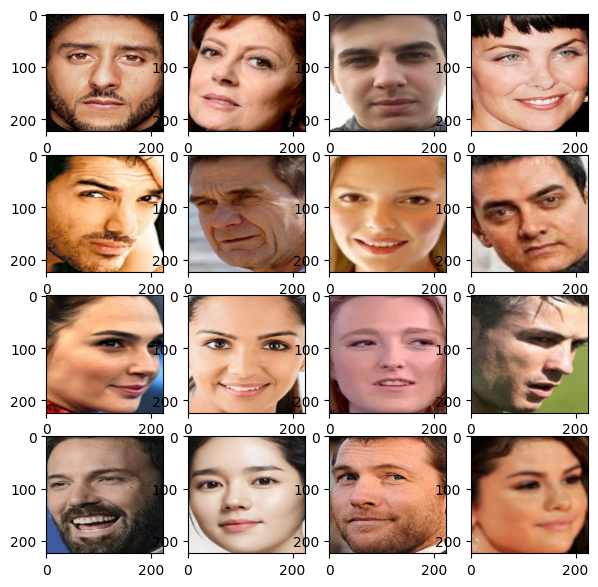

In [17]:
# show pictures and labels
plt.figure(figsize=(7,7))
for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.imshow(images[i])
    print(labels[i])

# <center> TensorFlow. We will create our model

In [32]:
# our model in tensorflw is the same as the one in pytoch above
model1 = Sequential([
    InputLayer((224,224,3)),
    
    Conv2D(8, (3,3), padding="same", activation="relu", strides=1),
    MaxPool2D(2,2),  #112x112x8
    
    Conv2D(16, (3,3), padding="same", activation="relu", strides=1),
    
    
    MaxPool2D(2,2),  #56x56x16
    
    Conv2D(32, (3,3), padding="same", activation="relu", strides=1),
    MaxPool2D(2,2),  #28x82x32
    
    Conv2D(64, (3,3), padding="same", activation="relu", strides=1),
    MaxPool2D(2,2),  #14x14x64
    
    Flatten(),
    
    Dense(100, activation="relu"),    
    
    Dense(2, activation="softmax")
    
])

In [33]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 8)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 16)      1168      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 56, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 28, 28, 32)      

In [34]:
# we get optimizer and losses
model1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")


# <center> TensorFlow. Train

In [35]:
with tf.device(":/GPU:0"):
    model1.fit(train_data, epochs=10)

Epoch 1/10
59/59 [==============================] - 4s 49ms/step - loss: 0.6251 - accuracy: 0.6604
Epoch 2/10
59/59 [==============================] - 3s 51ms/step - loss: 0.3853 - accuracy: 0.8390
Epoch 3/10
59/59 [==============================] - 3s 52ms/step - loss: 0.2892 - accuracy: 0.8742
Epoch 4/10
59/59 [==============================] - 3s 51ms/step - loss: 0.2287 - accuracy: 0.9094
Epoch 5/10
59/59 [==============================] - 3s 51ms/step - loss: 0.1777 - accuracy: 0.9323
Epoch 6/10
59/59 [==============================] - 3s 50ms/step - loss: 0.1419 - accuracy: 0.9483
Epoch 7/10
59/59 [==============================] - 3s 52ms/step - loss: 0.1024 - accuracy: 0.9584
Epoch 8/10
59/59 [==============================] - 3s 50ms/step - loss: 0.0769 - accuracy: 0.9691
Epoch 9/10
59/59 [==============================] - 3s 50ms/step - loss: 0.0581 - accuracy: 0.9803
Epoch 10/10
59/59 [==============================] - 3s 50ms/step - loss: 0.0313 - accuracy: 0.9909


# <center> TensorFlow. Evaluate

In [36]:
model1.evaluate(test_data)

15/15 [==============================] - 1s 35ms/step - loss: 0.1949 - accuracy: 0.9383


[0.19489070773124695, 0.9382978677749634]

# <center> TensorFlow. Predict

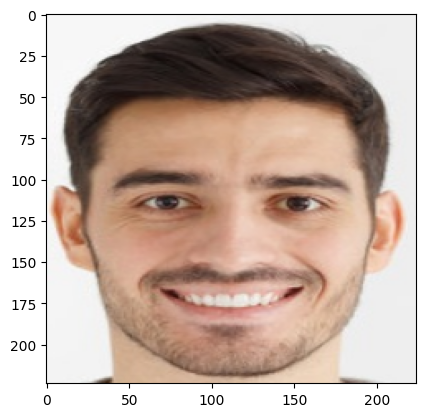

In [37]:
# we can read the picture
rasm = cv2.imread("Photo/man2.jpg")
rasm = cv2.cvtColor(rasm, cv2.COLOR_BGR2RGB)
rasm = cv2.resize(rasm, (224,224))
plt.imshow(rasm)

In [38]:
# we get the size of the image as a tensor
rasm = np.expand_dims(rasm,  axis=0)
rasm.shape

(1, 224, 224, 3)

In [39]:
# Predict
predict = model1.predict(rasm)
predict

1/1 [==============================] - 0s 90ms/step


array([[1., 0.]], dtype=float32)

In [40]:
# see which class it belongs to
sinf = np.argmax(predict)
sinf
if sinf==0:
    print("Man")
else:
    print("Woman")

Man


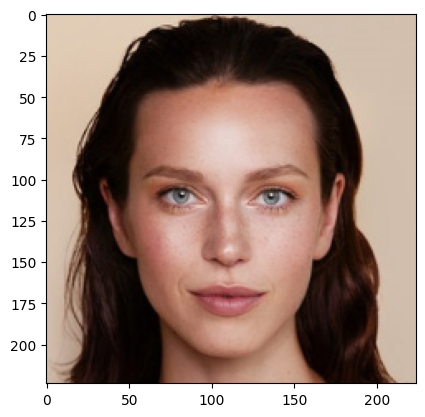

In [41]:
# we can read the picture
rasm = cv2.imread("Photo/woman11.jpg")
rasm = cv2.cvtColor(rasm, cv2.COLOR_BGR2RGB)
rasm = cv2.resize(rasm, (224,224))
plt.imshow(rasm)

In [42]:
# we get the size of the image as a tensor
rasm = np.expand_dims(rasm,  axis=0)
rasm.shape

(1, 224, 224, 3)

In [43]:
# Predict
predict = model1.predict(rasm)
predict

1/1 [==============================] - 0s 15ms/step


array([[0., 1.]], dtype=float32)

In [44]:
# see which class it belongs to
sinf = np.argmax(predict)
sinf
if sinf==0:
    print("Man")
else:
    print("Woman")

Woman


## Our accuracy is almost the same in both frameworks. 😊

# <center> <h1> 👨‍💻   🚀  